Python program to calculate, using the relaxation method, the potential and electric fields of a wedge

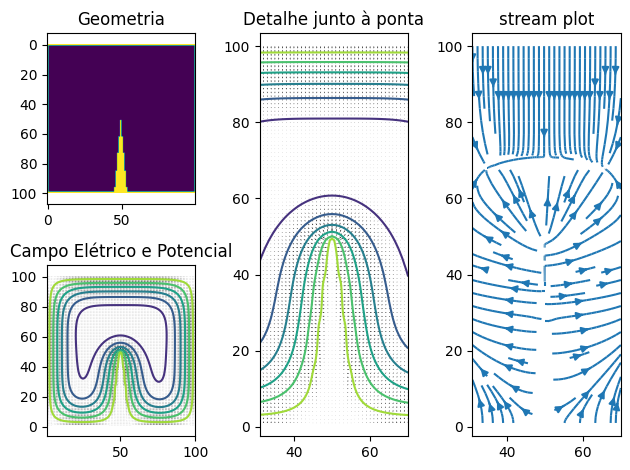

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# condição de convergência:
#      DeltaV/V máximo entre iterações menor que espilon
epsilon = 1e-2

# Potencial da "cunha"
Vcunha = 1

# Posição da ponta da "cunha"
Xcunha = 50
Ycunha = 50

# ângulo da "cunha"
alpha = 5

# cria a "grid" para desenhar a cunha
#
#  meshgrid cria duas matrizes,
#   - uma só incremento na direção x:
#   X = 1     2     3     4
#       1     2     3     4
#       1     2     3     4
#       1     2     3     4
#   - e outra com incremento na direção y:
#   Y = 1     1     1     1
#       2     2     2     2
#       3     3     3     3
#       4     4     4     4
#
#  Estas matrizes permitem fazer contas "ponto a ponto" para uma todas
#   as coordenada (x,y) de uma só vez.
#  ... por exemplo, sin(X.*Y) devolve um array com a função sin(x*y).

X, Y = np.meshgrid(np.arange(1, 101), np.arange(1, 101))

# cunha: cria uma matriz com "1" onde a cunha existe
cunha = ((Y < Ycunha) *                                 # a cunha fica abaixo de Ycunha
         (X < Xcunha - (Y - Ycunha) * np.tan(np.radians(alpha))) *  # limite supeior da cunha em x
         (X > Xcunha + (Y - Ycunha) * np.tan(np.radians(alpha)))    # limite supeior da cunha em y
   )

# moldura: cria uma moldura ao mesmo potencial da cunha
moldura = np.zeros((100, 100))
moldura[0, :] = 1   # borda no topo
moldura[-1, :] = 1  # borda na base
moldura[:, 0] = 1   # borda esquerda
moldura[:, -1] = 1  # borda direita

# conjunto cunha e moldura
setV = (cunha + moldura) > 0

# define o potencial nos condutores (condição fronteira)
V = Vcunha * setV

# relaxação
difrelmax = 1 # np.inf  # % inicializa dif relativa máxima entre iterações para inf
while difrelmax > epsilon:
    W = V.copy()  # guarda o potencial anterior em W
    V = ( np.roll(W,+1,0) +   # oeste
          np.roll(W,-1,0) +   # este
          np.roll(W,+1,1) +   # sul
          np.roll(W,-1,1)     # norte
          )/ 4                # média
  # força o potencial na cunha e moldura
    V[setV] = Vcunha
  # calcula o novo campo elétrico
    Ey, Ex = np.gradient(-V)
  # recalcula a diferença relativa máxima:
    difrelmax = np.max(np.abs((V - W) / (W+1e-100)))

plt.close('all')
fig = plt.figure()

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (1, 0))
ax3 = plt.subplot2grid((2, 3), (0, 1), rowspan=2)
ax4 = plt.subplot2grid((2, 3), (0, 2), rowspan=2)

ax1.imshow(setV[::-1,:])
ax1.axis('equal')
ax1.set_title("Geometria")

ax2.quiver(X,Y,Ex,Ey)
ax2.contour(X,Y,V)
ax2.axis('equal')
ax2.set_title("Campo Elétrico e Potencial")

ax3.quiver(X[:,30:70],Y[:,30:70],Ex[:,30:70], Ey[:,30:70])
ax3.contour(X[:,30:70],Y[:,30:70],V[:,30:70])
ax3.axis('equal')
ax3.set_title("Detalhe junto à ponta")

ax4.streamplot(X[:,30:70],Y[:,30:70],Ex[:,30:70], Ey[:,30:70])
ax4.axis('equal')
ax4.set_title("stream plot")

plt.tight_layout()

